In [1]:
#import libraries
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define preprocessing transformation
preprocess_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels 
    transforms.ToTensor(),          # Convert the image to a tensor
    transforms.Normalize(
        # Normalization mean for ImageNet that already computed
        mean=[0.485, 0.456, 0.406],  #mean  represents avg color intensity
        # Normalization std for ImageNet that already computed
        std=[0.229, 0.224, 0.225]    #std represent how much color itensity from mean
    )
])

In [3]:
#augmentaion for training
augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0,406],
        std=[0.229, 0.224, 0.255]
    )
])

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [5]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert('RGB')  # Convert to RGB
            images.append(img)
    return images

# Load your images and labels
folder_path = r'C:\Users\user\Documents\!TA\!TA\cornealtopography\Independent Test Set\Independent Test Set\Keratoconus\case1'
images = load_images_from_folder(folder_path)
labels = [0, 1, 0, 1, ...]  # Example labels, replace with your actual labels

# Create dataset with the augmentation transform
train_dataset = CustomImageDataset(images, labels, transform=augment_transform)

# Create data loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 0

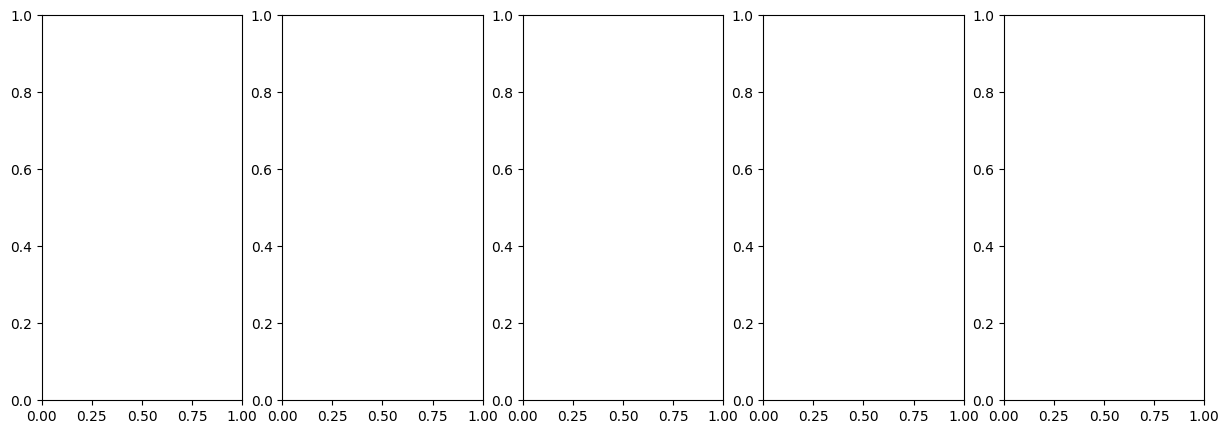

In [6]:
def visualize_augmented_images(dataset, num_images=5, figsize=(15, 5)):
    fig, axs = plt.subplots(1, num_images, figsize=figsize)
    for i in range(num_images):
        image, _ = dataset[i]
        image = image.permute(1, 2, 0).numpy()  # Convert to HWC format
        image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize
        image = np.clip(image, 0, 1)  # Ensure the image values are between 0 and 1

        axs[i].imshow(image)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

# Visualize some augmented images
visualize_augmented_images(train_dataset)
